# Mohd Sajid Khan

# GRIP-THE SPARKS FOUNDATION


##  TASK 3-Exploratory data analysis - Retail

### Step 1:Import libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
retail=pd.read_csv(r"C:\Users\suhail\Desktop\SampleSuperstore.csv")

In [3]:
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##  Step2: Dataset analysis and data cleaning

In [4]:
retail.shape

(9994, 13)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
retail.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
retail.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
c=['Postal Code', 'Country']
retail1=retail.drop(columns=c,axis=1)
retail1.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Step3: Data Visualisation

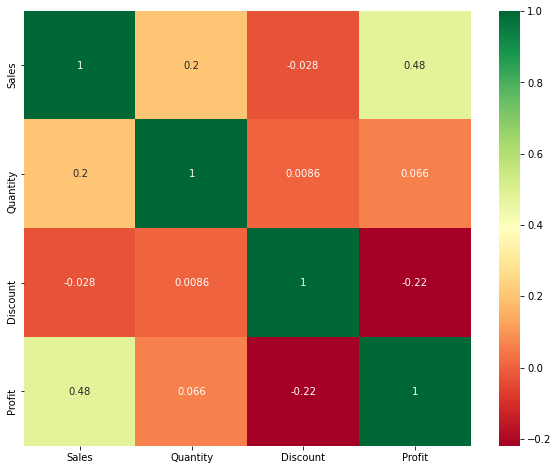

In [11]:
plt.figure(figsize=(10,8))
correlation=retail1.corr()
sns.heatmap(correlation,annot=True,cmap="RdYlGn")
plt.show()

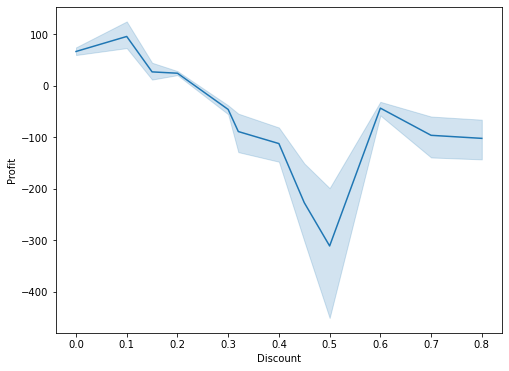

In [12]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Discount',y='Profit',data=retail1)
plt.show()

In [13]:
profitsum=retail1.groupby("State")["Profit"].sum()
profitsum

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76381.3871
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

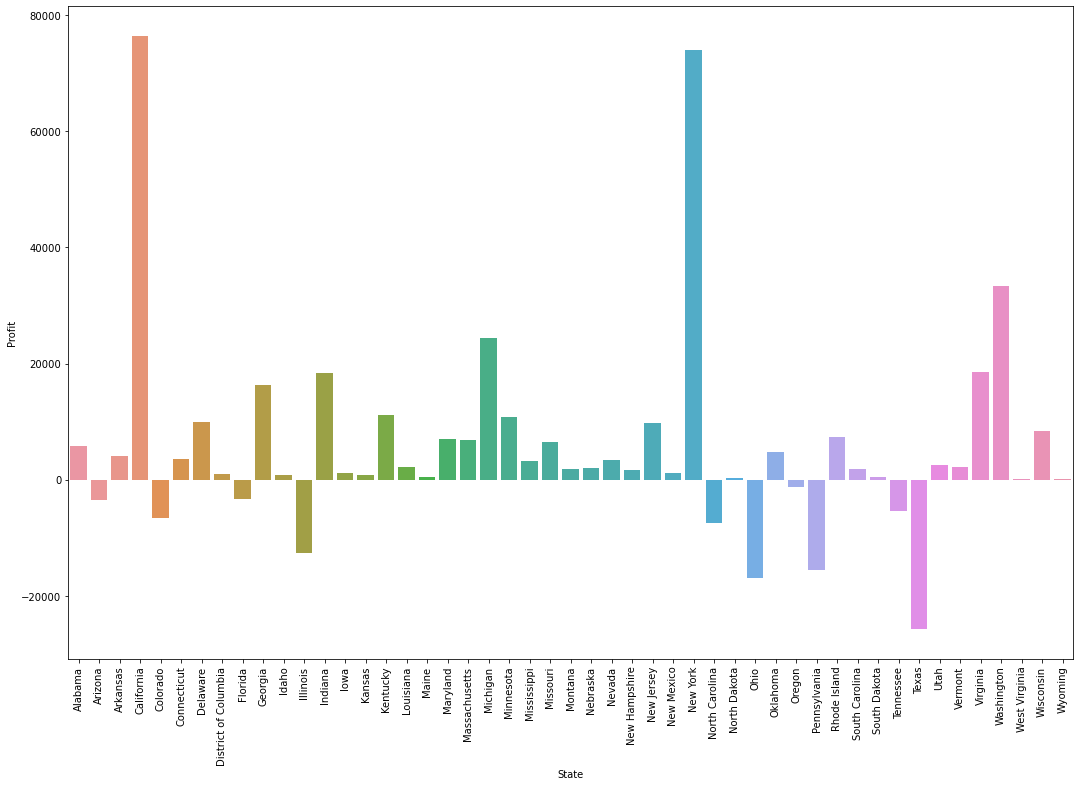

In [14]:
plt.figure(figsize=(18,12))
sns.barplot(x=profitsum.index,y=profitsum.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

In [15]:
sales_sum=retail1.groupby("State")["Sales"].sum()
sales_sum

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

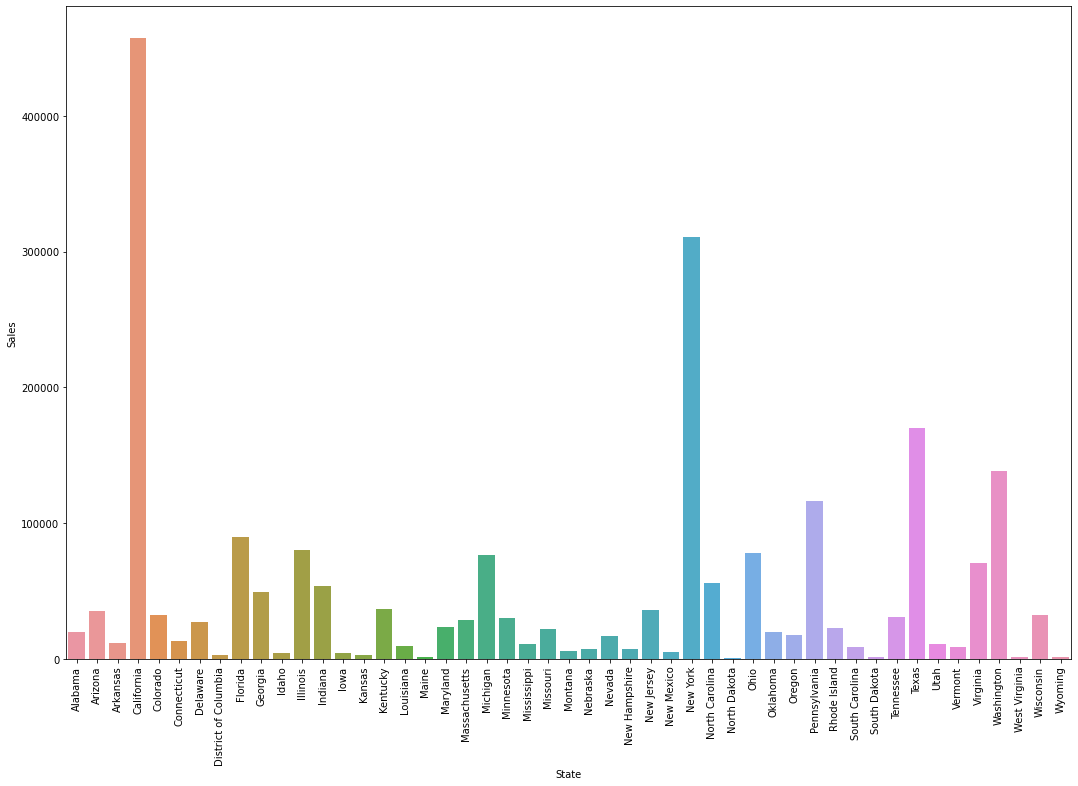

In [16]:
plt.figure(figsize=(18,12))
sns.barplot(x=sales_sum.index,y=sales_sum.values)
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

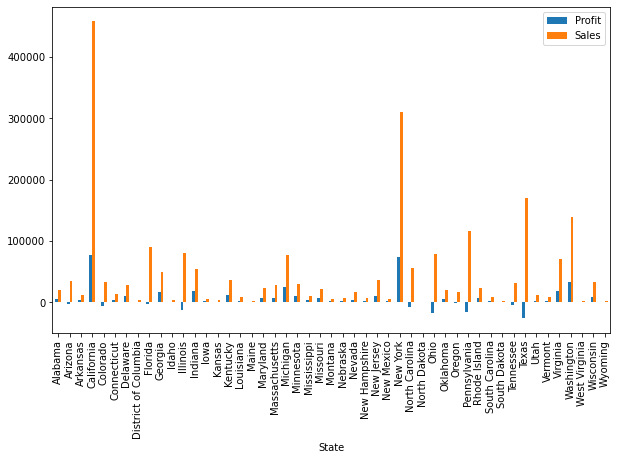

In [17]:
profit_sales=retail1.groupby("State")["Profit","Sales"].sum()
profit_sales.plot.bar(figsize=(10,6))
plt.show()

In [18]:
avg_dis=retail1.groupby("State")["Discount"].mean()*100
avg_dis

State
Alabama                  0.000000
Arizona                 30.357143
Arkansas                 0.000000
California               7.276362
Colorado                31.648352
Connecticut              0.731707
Delaware                 0.625000
District of Columbia     0.000000
Florida                 29.934726
Georgia                  0.000000
Idaho                    8.571429
Illinois                39.004065
Indiana                  0.000000
Iowa                     0.000000
Kansas                   0.000000
Kentucky                 0.000000
Louisiana                0.000000
Maine                    0.000000
Maryland                 0.571429
Massachusetts            1.555556
Michigan                 0.705882
Minnesota                0.000000
Mississippi              0.000000
Missouri                 0.000000
Montana                  6.666667
Nebraska                 0.000000
Nevada                   6.153846
New Hampshire            1.111111
New Jersey               0.461538
New Mexi

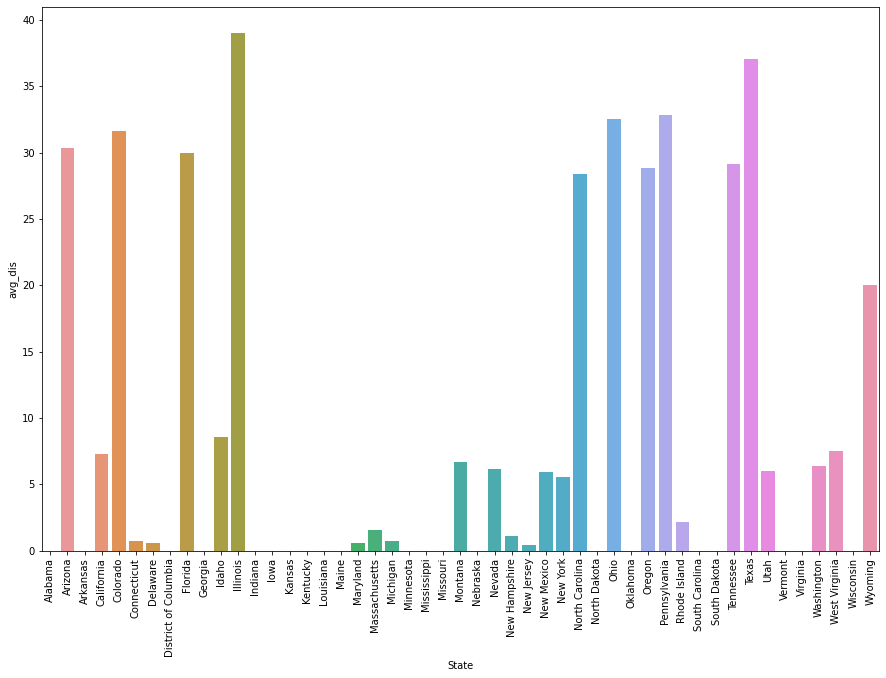

In [19]:
plt.figure(figsize=(15,10))
sns.barplot(x=avg_dis.index,y=avg_dis.values)
plt.ylabel("avg_dis")
plt.xticks(rotation=90)
plt.show()

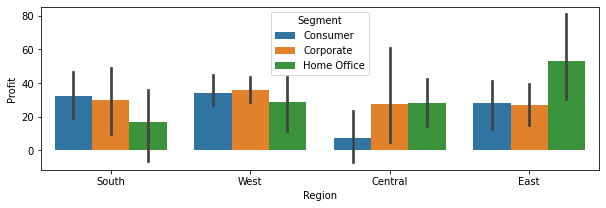

In [20]:
plt.figure(figsize=(10,3))
                    
                    
sns.barplot(data=retail1, x="Region",y="Profit",hue="Segment")
plt.show()

In [21]:
category=retail1.groupby(['Category'])[['Sales','Discount','Profit']].mean()
category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


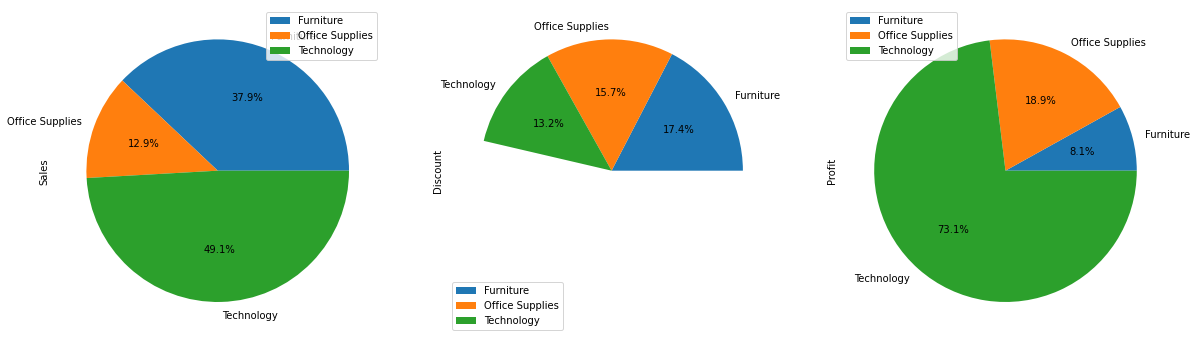

In [23]:
category.plot.pie(subplots=True,figsize=(20,18),autopct='%0.1f%%',labels=category.index)
plt.show()

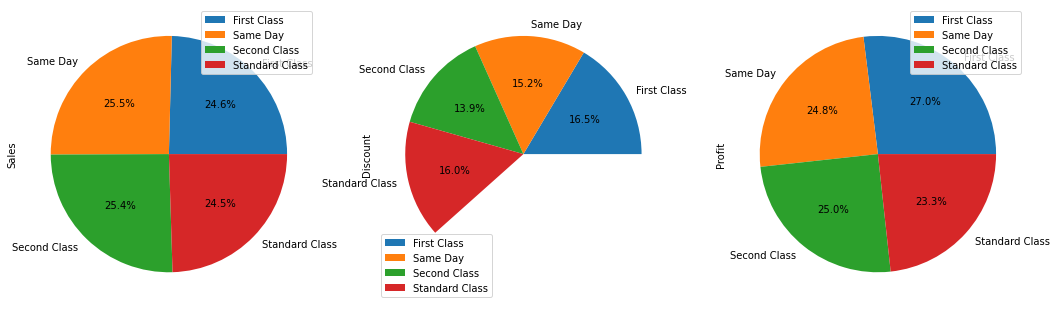

In [25]:
shipmode=retail.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
shipmode.plot.pie(subplots=True,figsize=(18,20),autopct='%0.1f%%',labels=shipmode.index)
plt.show()

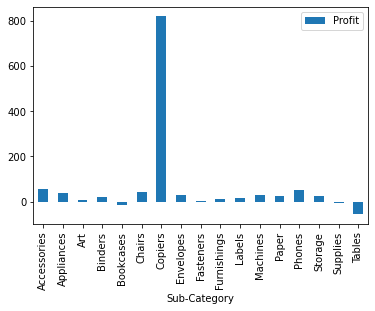

In [28]:
pivot=pd.pivot_table(retail1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')
plt.show()

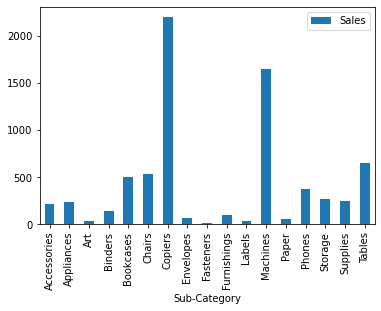

In [30]:
pivot1=pd.pivot_table(retail1,index='Sub-Category',values ='Sales')
pivot1.plot(kind='bar')
plt.show()


# Conclusion

* 1- Top 4 profit giving states :'california','New York','Washington',and 'michigan'.We can increase sales in these states for increasing profit.
* 2- Top 4 loss giving states :'Illionis','Pennsylvania','ohio' and 'texas'. we have to pay attention to these states for reducing the loss and making these states on a positive cash flow.
* 3-Top 4 states with highest sales : 'california','New york','texas' and 'washington' and top 4 states with lowest sales:'North dakota','maine','west virginia' and 'South dakota'.we have to increase the sales of low sales states.
* 4- Taxes, pennylvania and ohio have the high sales but negative profit i.e,loss.
* 5-Illionis has the highest no avg discount percent among the states of usabut profit and sales are low here . So we can reduce discount % in illionis
* 6- highest profits for each region are as follows : South=Consumer Segment,West=Corporates Segment,Central=Home office segment and east= Home office segment. we can increase the sales of respective highest profit by making segments in the respective region.

# Thank you